# Sheet 04

## Preamble

Autors: Marten Ringwelski, Nico Ostermann, Simon Liessem

Note that this notebook MUST be executed in order to get everything to work.
The tasks can't be run individually. 

Also eCampus does not allow for uploading nested directory structures which makes it hard to properly organize the files. The files are expected to be in the `data` directory which itself is placed next to this notebook.

If you extract the zip file we handed in everything should work just fine.

Autoformatting if `jupyter-black` is installed.

In [1]:
try:
    import black
    import jupyter_black

    jupyter_black.load(
        lab=False,
        line_length=79,
        verbosity="DEBUG",
        target_version=black.TargetVersion.PY310,
    )
except ImportError:
    pass

DEBUG:jupyter_black:config: {'line_length': 79, 'target_versions': {<TargetVersion.PY310: 10>}}


<IPython.core.display.Javascript object>

Import all we weed and more.

Set seaborn default theme

In [36]:
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.feature_selection import f_classif, SelectKBest
import math as m
import plotly.express as px
import sklearn.manifold

Set seaborn default theme

In [3]:
sns.set_theme()

If needed tweak parameters of matplotlib.
Here we increase the size and dpi to bet a bigger but still high-res image.

In [80]:
mpl.rcParams["figure.dpi"] = 200
mpl.rcParams["figure.figsize"] = (20, 15)
%matplotlib inline

## Exercise 1

### a)

In [ ]:
Read the dataframe and replace missing values by the respective mean of the column.

In [26]:
df = pd.read_excel("data/breast-cancer-wisconsin.xlsx")
df = df.fillna(df.mean())

df["class"] = df["class"].map({2: "benign", 4: "malignant"})

Now define the DataFrame for t-SNE and create a new one with the result.

In [30]:
data_columns = df.columns.difference(["class", "code"])

In [31]:
df_wo_meta = df[data_columns]

Do t-SNE with different perplexities as the task asked us to.


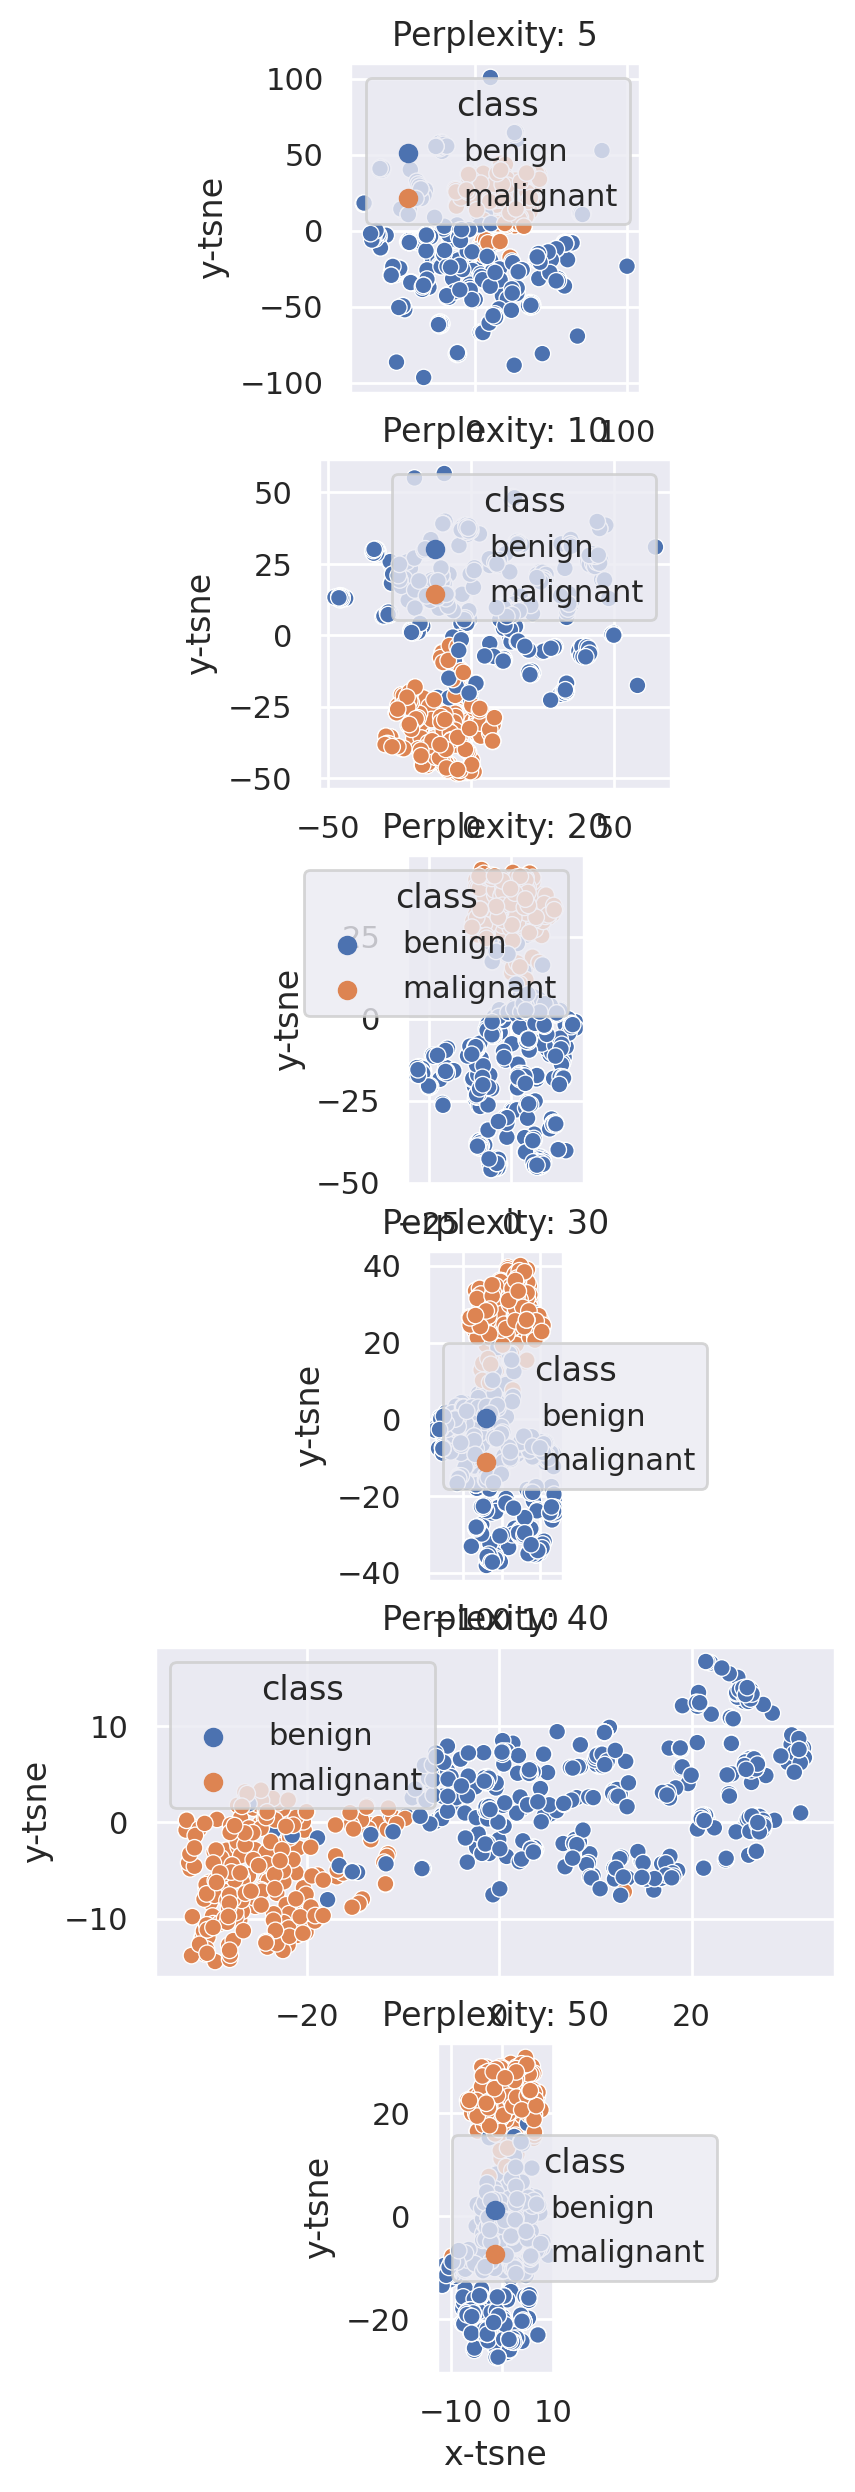

In [82]:
perplexities = [5, 10, 20, 30, 40, 50]
fig, axs = plt.subplots(len(perplexities))
for perplexity, ax in zip(perplexities, axs):
    tsne = sk.manifold.TSNE(
        n_components=2,
        perplexity=perplexity,
        init="random",
        learning_rate="auto",
    )

    df_tsne = pd.DataFrame(
        tsne.fit_transform(df_wo_meta),
        columns=["x-tsne", "y-tsne"],
        index=df.index,
    )
    df[df_tsne.columns] = df_tsne

    ax.set_title(f"Perplexity: {perplexity}")
    ax.set_aspect("equal")
    sns.scatterplot(
        data=df,
        x="x-tsne",
        y="y-tsne",
        hue="class",
        ax=ax,
    )

Copy paste from above but init="pca"

In [ ]:
perplexities = [5, 10, 20, 30, 40, 50]
fig, axs = plt.subplots(len(perplexities))
for perplexity, ax in zip(perplexities, axs):
    tsne = sk.manifold.TSNE(
        n_components=2,
        perplexity=perplexity,
        init="random",
        learning_rate="auto",
    )

    df_tsne = pd.DataFrame(
        tsne.fit_transform(df_wo_meta),
        columns=["x-tsne", "y-tsne"],
        index=df.index,
    )
    df[df_tsne.columns] = df_tsne

    ax.set_title(f"Perplexity: {perplexity}")
    ax.set_aspect("equal")
    sns.scatterplot(
        data=df,
        x="x-tsne",
        y="y-tsne",
        hue="class",
        ax=ax,
    )

TODO what do we no?

### c)

Read data and use mean for missing data.

In [119]:
df = pd.read_excel(
    "data/Data_Cortex_Nuclear.xls",
    index_col="MouseID",
)
df = df.fillna(df.mean())

/tmp/ipykernel_7136/3566540890.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [120]:
meta_columns = ["Genotype", "Treatment", "Behavior", "class"]
df_wo_meta = df[df.columns.difference(meta_columns)]

df_scs = df_wo_meta[
    np.logical_or(
        df["class"] == "c-SC-s",
        df["class"] == "t-SC-s",
    )
]

Now actuall do PCA and create a DataFrame with the result.
Also we use equal axis scale for the plot which makes sense since we care about the results from PCA.

In [123]:
pca = sk.decomposition.PCA(
    n_components=2,
)
# XXX There must be a better way to do this
df_pca = pd.DataFrame(
    pca.fit_transform(df_scs),
    columns=["x-pca", "y-pca"],
    index=df_scs.index,
)
# TODO Slicing, copy, whatever
df_scs[df_pca.columns] = df_pca
df_scs[meta_columns] = df[meta_columns]

/tmp/ipykernel_7136/3678282857.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scs[df_pca.columns] = df_pca
/tmp/ipykernel_7136/3678282857.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scs[meta_columns] = df[meta_columns]
/tmp/ipykernel_7136/3678282857.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

<AxesSubplot: xlabel='x-pca', ylabel='y-pca'>

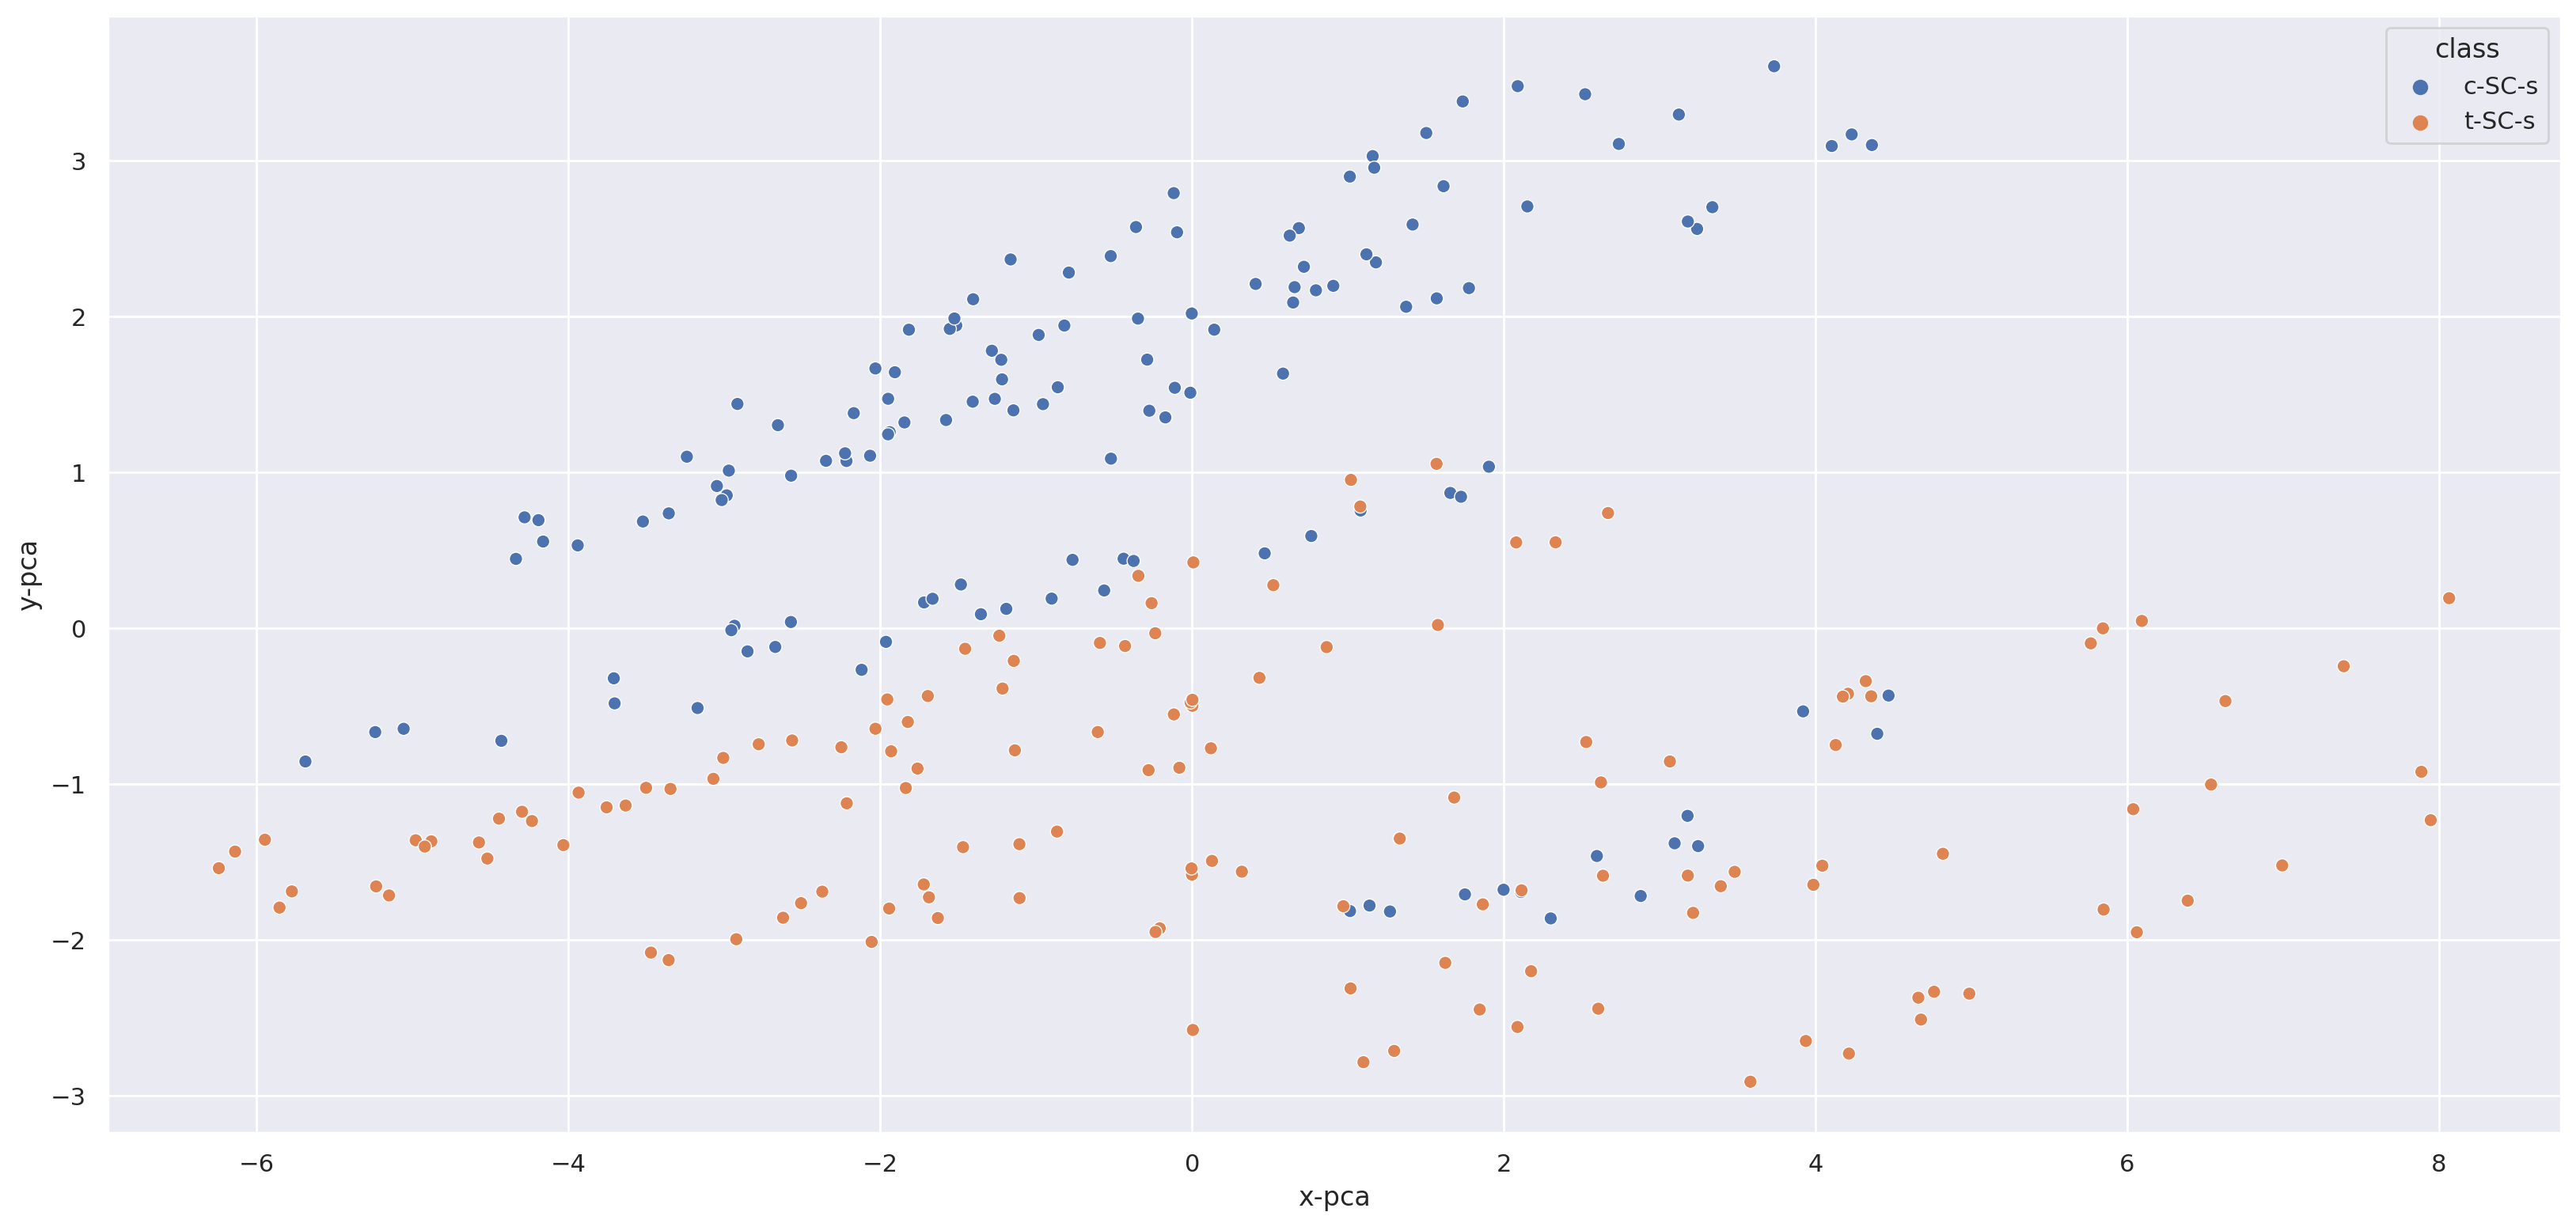

In [128]:
plt.gca().set_aspect("equal")

sns.scatterplot(
    df_scs,
    x="x-pca",
    y="y-pca",
    hue="class",
)

TODO
- isomap
- tsne with different settings